In [9]:
import numpy as np
from scipy.integrate import quad
from scipy.special import gammaincc, gamma, gammainc
import scipy.constants as const
import matplotlib.pyplot as plt

In [10]:
# Value
kpc = 3.086e+19
#kpc = 1

L = 50 * kpc
M_sol = 1.9884e30

R_h = 11.41 * kpc
R_0 = 8.5 * kpc
rho_0 = 0.01992e9 * M_sol / kpc**3
n = 0.43

# Value of c
#c = 1
c = const.c

# Value of G
#G = 4.30091e-6 / M_sol
G = const.G 

pi = np.pi

In [11]:
# Optical depth

def opt(I, l):
    m = G * I / (c**2 * l)
    return m

In [12]:
# Halo density formula
def rho(x, l):
    return rho_0 * np.exp(-(l * x/R_h)**(1/n)) 

# Halo Mass formula
#def M(x, l):
 #   return 4 * n * pi * rho_0 * R_h**3 * (gamma(3 * n) - gamma(3 * n) * gammaincc(3 * n, (l * x/R_h)**(1/n)))

# Halo Mass formula
def M(x, l):
    return 4 * n * pi * rho_0 * R_h**3 *  (gamma(3 * n) * gammainc(3 * n, (l * x/R_h)**(1/n)))

# First integral v(x)
def u1(x):
    return x**2 / 2 - x * np.log(x) + x

#First inetgral value
def I1(a, b, l):
    return M(b, l) * u1(b) - M(a, l) * u1(a)

# M'(x)
def M_(x, l):
    return 4 * pi * l**3  *  rho(x, l) * x**2

# Second integral value
def integrand(x, l):
    return M_(x, l) * u1(x)

# Mass formula
def int(x, l):
    return G * (M(x, l) * (x - np.log(x))) / (c**2 * L)

In [13]:
l_value = np.arange(8.5, 50, 0.5)


int_val = []
int_val1 = []

for k in l_value:
    l = k * kpc
    res1 = I1(R_0/l, 1, l)
    res2, error = quad(integrand, R_0/l, 1, args=(l,))
    res3, er3 = quad(int, R_0/l, 1, args=(l,))
    
    result = G * (res1 - res2) / (c**2 * L)
    result1 = (res3) 
    
    int_val.append(result)
    int_val1.append(result1)


int_val = np.array(int_val)
int_val1 = np.array(int_val1)


print(int_val)
print(int_val1)

[0.00000000e+00 2.21900836e-09 4.49729995e-09 6.83936593e-09
 9.24529633e-09 1.17118884e-08 1.42334910e-08 1.68026725e-08
 1.94107638e-08 2.20483100e-08 2.47054494e-08 2.73722323e-08
 3.00388875e-08 3.26960402e-08 3.53348873e-08 3.79473309e-08
 4.05260746e-08 4.30646859e-08 4.55576265e-08 4.80002569e-08
 5.03888168e-08 5.27203873e-08 5.49928371e-08 5.72047582e-08
 5.93553940e-08 6.14445630e-08 6.34725813e-08 6.54401862e-08
 6.73484630e-08 6.91987767e-08 7.09927088e-08 7.27320017e-08
 7.44185087e-08 7.60541517e-08 7.76408855e-08 7.91806677e-08
 8.06754354e-08 8.21270861e-08 8.35374640e-08 8.49083495e-08
 8.62414525e-08 8.75384080e-08 8.88007745e-08 9.00300332e-08
 9.12275893e-08 9.23947742e-08 9.35328476e-08 9.46430012e-08
 9.57263616e-08 9.67839943e-08 9.78169069e-08 9.88260525e-08
 9.98123334e-08 1.00776604e-07 1.01719675e-07 1.02642313e-07
 1.03545248e-07 1.04429172e-07 1.05294743e-07 1.06142587e-07
 1.06973300e-07 1.07787449e-07 1.08585576e-07 1.09368196e-07
 1.10135802e-07 1.108888

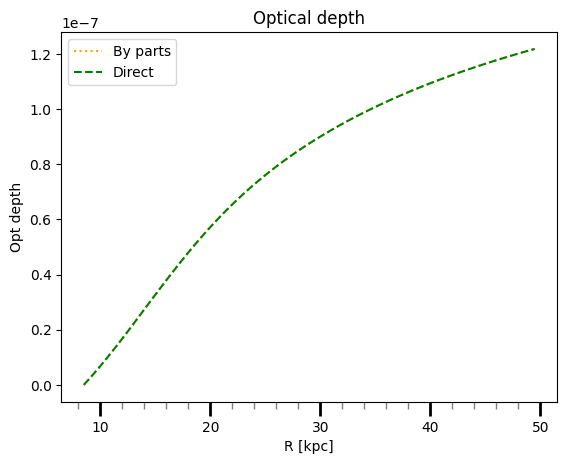

In [14]:
# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.plot(l_value, int_val, label = 'By parts', color = 'orange', linestyle = ':')
ax.plot(l_value, int_val1, label = 'Direct', color = 'green', linestyle = '--')

# Set major ticks locator and format
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Customize the ticks
ax.tick_params(axis='x', which='major', length=10, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')

# Set labels
ax.set_xlabel('R [kpc]')
ax.set_ylabel('Opt depth')
ax.set_title('Optical depth')

# Show the grid
ax.grid(False, which='both')
plt.legend()

# Display the plot
plt.show()

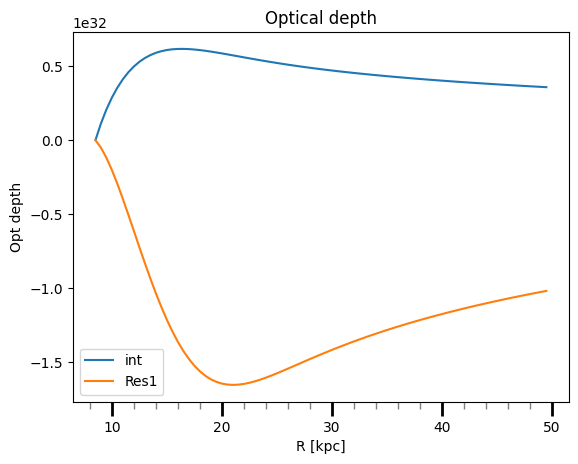

In [15]:
import numpy as np
from scipy.integrate import quad
from scipy.special import gammaincc, gamma
import scipy.constants as const
import matplotlib.pyplot as plt

# Value
kpc = 3.086e+19
#kpc = 1

L = 50 * kpc

R_h = 11.41 * kpc
R_0 = 8.5 * kpc
rho_0 = 0.01992 * 1.9884e30 / (kpc)**3
n = 0.43

# Value of c
#c = 1
#c = 3e8
c = const.c

# Value of G
#G = 1
#G = 4.30091e+3 * 3.086e+19/(1.9884e30)
G = const.G

pi = np.pi

# Opt depth
def opt(I, l):
    return G * I / (c**2 * l)

# Halo density formula
def rho(R):
    return rho_0 * np.exp(-(R/R_h)**(1/n))

# Halo Mass formula
def M(R):
    return 4 * n * pi * rho_0* R_h**3 * gamma(3 * n) * gammaincc(3 * n, (R/R_h)**(1/n))

# First integral v(x)
def u1(x):
    return x**2 / 2 - x * np.log(x) + x

#First inetgral value
def I1(a, b, l):
    return M(l * b) * u1(b) - M(l * a) * u1(a)

# M'(x)
def M_(x, l):
    return 4 * pi * l * x**2

def integrand(x, l):
    return M_(x, l) * u1(x)

def integrand1(x, l):
    return M(l * x) * (x - np.log(x))

l_value = np.arange(8.5, 50, 0.5)

int_val = []
int_val0 = []
int_val1 = []
Res1 = []
Res2 = []
tau = []

for k in l_value:
    l = k * kpc
    res1 = I1(R_0/l, 1, l)
    res2, error = quad(integrand, R_0/l, 1, args=(l,))
    
    result = abs(res1 - res2)

    res3, error1 = quad(integrand1, R_0/l, 1, args=(l,))

    res4 = abs(res3 - result)
    
    OPT = opt(res4, l)
    
    Res1.append(res1)
    Res2.append(res2)
    
    int_val0.append(result)
    int_val1.append(res3)
    int_val.append(res3)
    
    

Res1 = np.array(Res1)
Res2 = np.array(Res2)
    
int_val = np.array(int_val)
int_val0 = np.array(int_val0)
int_val1 = np.array(int_val1)
    
# Create the plot
fig, ax = plt.subplots()

# Plot the data
#ax.plot(l_value, int_val0, label='int by parts')
ax.plot(l_value, int_val, label='int')
ax.plot(l_value, Res1, label='Res1')
#ax.plot(l_value, Res2, label='Res2')

# Set major ticks locator and format
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Customize the ticks
ax.tick_params(axis='x', which='major', length=10, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')

# Set labels
ax.set_xlabel('R [kpc]')
ax.set_ylabel('Opt depth')
ax.set_title('Optical depth')

ax.legend()

# Show the grid
ax.grid(False, which='both')

# Display the plot
plt.show()




In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import gammaincc, gamma

# Constants
R_h = 11.41
n = 0.43
rho0 = 

# Define the integrand function
def integrand(x, L):
    gamma_upper = gamma(3 * n) * gammaincc(3 * n, (L * x / R_h) ** (1 / n))
    return 4 * n * np.pi * gamma_upper * (x - np.log(x))

# Function to perform integration
def integrate_function(L, x_min=0.17, x_max=1):
    result, _ = quad(integrand, x_min, x_max, args=(L,))
    return result

# Generate L values and compute integrals
L_values = np.linspace(8.5, 50, 100)  # 100 values from 8.5 to 50
integral_results = [integrate_function(L) for L in L_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(L_values, integral_results, marker='o', linestyle='-', color='b')
plt.title('Integration Result vs L')
plt.xlabel('L')
plt.ylabel('Integration Result')
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (387071756.py, line 9)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
R_h = 11.41
n = 0.43

# Define the integrand function
def integrand(x, L):
    exponential_term = np.exp(-((L * x / R_h) ** (1 / n)))
    polynomial_term = x**2 * (x**2 / 2 - x * np.log(x) + x)
    return exponential_term * polynomial_term

# Function to perform integration
def integrate_function(L, x_min=0.17, x_max=1):
    result, _ = quad(integrand, x_min, x_max, args=(L,))
    return result

# Generate L values and compute integrals
L_values = np.linspace(8.5, 50, 100)  # 100 values from 8.5 to 50
integral_results = [integrate_function(L) for L in L_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(L_values, integral_results, marker='o', linestyle='-', color='b')
plt.title('Integration Result vs L')
plt.xlabel('L')
plt.ylabel('Integration Result')
plt.grid(True)
plt.show()


In [ ]:
print(gamma(3 * n) * gammaincc(3 * n, 31.066276916398863))
print(gamma(3 * n) * gammaincc(3 * n, 0.504237960935565))
print(gammainc(3 * n, 31.066276916398863))
print(gammainc(3 * n, 0.504237960935565))